# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data/train_submission.csv"
df = pd.read_csv(path)
df = df.drop(columns=['Usage'])

In [3]:
df.head()

,Text,Label
0,َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...,hau
1,Filmen forteller historien om Will Hunting en...,nob
2,An Arthrostylidium berryi in uska species han ...,wln
3,Kancunarí enemigosniyquichejta munacuychej al...,quh
4,Warmeqa ama yachachichunchu hermanospa tantaku...,quh


In [4]:
print('Number of lines in training df:', df.shape[0])

Number of lines in training df: 190599


# NaN

In [5]:
nan_labels_nb = df['Label'].isna().sum()
print('Number of NaN labels in the train dataset', nan_labels_nb)

Number of NaN labels in the train dataset 500


In [6]:
# NaN deletion
print('df length before NaN deletion:', df.shape[0])
df = df.dropna()
print('df length after NaN deletion:', df.shape[0])

df length before NaN deletion: 190599
df length after NaN deletion: 190099


# LABELS NUMBER AND DISTRIBUTION

In [7]:
# Number of classes
print('Number of unique labels:', len(df['Label'].unique()))

Number of unique labels: 389


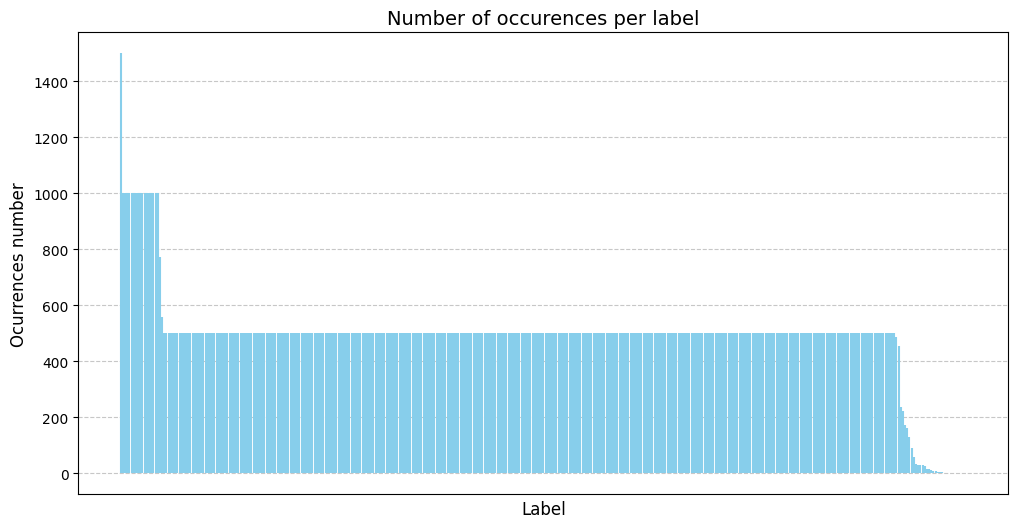

In [8]:
# Compter les occurrences par classe et trier
class_counts = df['Label'].value_counts().sort_values(ascending=False)

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.stem(class_counts.index, class_counts.values, linefmt='skyblue', markerfmt=' ', basefmt=" ")

# Ajouter un titre et des labels
plt.title("Number of occurences per label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Ocurrences number", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotation des labels pour meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove x-axis
plt.xticks([])  # Hide tick labels

# Afficher le graphique
plt.show()

In [9]:
# Label with the highest number of occurences
top_1_class = df['Label'].value_counts().idxmax()
print(top_1_class, 'is the label with highest number of occurences:', df[df['Label']==top_1_class].shape[0])

tgk is the label with highest number of occurences: 1500


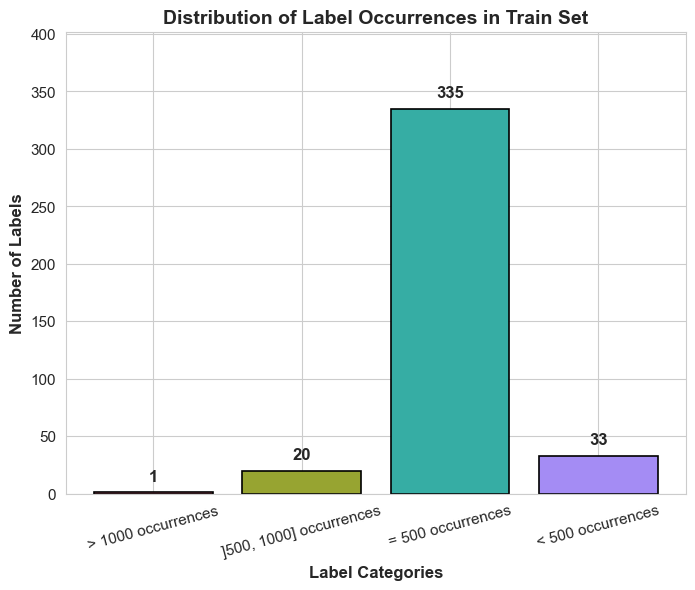

In [10]:
# Set seaborn style for a polished look
sns.set_style("whitegrid")
sns.set_palette("pastel")  # Soft modern color palette

# Data
categories = [
    "> 1000 occurrences",
    "]500, 1000] occurrences",
    "= 500 occurrences",
    "< 500 occurrences"
]
values = [1, 20, 335, 33]  # Number of labels in each category

# Create the plot
plt.figure(figsize=(8, 6))  # Adjusted size
colors = sns.color_palette("husl", len(categories))  # Colorful palette
bars = plt.bar(categories, values, color=colors, edgecolor='black', linewidth=1.2)

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(yval), 
             ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Label Categories", fontsize=12, fontweight='bold')
plt.ylabel("Number of Labels", fontsize=12, fontweight='bold')
plt.title("Distribution of Label Occurrences in Train Set", fontsize=14, fontweight='bold')

# Adjust y-axis range to provide more space
plt.ylim(0, max(values) * 1.2)  # Adds 20% space above

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)

# Show the plot
plt.show()


# OUTLIERS

In [11]:
# Labels with at most 2 text examples
outliers = df[df['Label'].map(df['Label'].value_counts()) <= 2]
outliers

,Text,Label
3448,Ng tela a dengua er kau?,pau
4202,Teuana uoua tenua aua nimaua onoua itua ...,gil
15244,Ko rabakau n taetae ni Kiribati?,gil
16312,Sena wasika ciindi nzi kung'anda yako?,toi
24375,Eendombwedi daJehowa odi dili moilongo 236 (6...,kua
28172,Jul (/dʒuːl/ (Djoul)) li k'aplé réèlman Juli...,gcr
46178,Ou nou papa ki dan lesyel...,crs
89294,Mɛni hewɔ ni oyaaa nitsumɔ ŋmɛnɛ lɛ?,gaa
93130,Tang erung edei euang eim elolm euid ea...,pau
118005,E o ai te mea nei?,tvl
